### We will use Kera's data augmentation feature.
### Why do we use data augmentation ? In image classification, we sometimes don't have enough data. How do we solve it ? We artificially create many more training examples! Let's get started by loading a picture. Of a cat. Obviously!

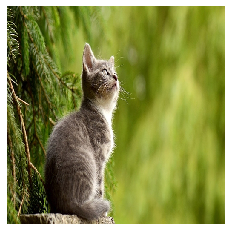

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

orig_img = load_img('./cat.jpg')
plt.imshow(orig_img)
plt.axis('off')
plt.show()

### Once you get over the cuteness of this cat, let's proceed further and do some image processing.

In [3]:
def augment( datagen ):
    image = np.array(orig_img).reshape(1, 512, 512, 3)
    datagen.fit(image)
    i = 0;
    _, ax = plt.subplots(nrows = 3, ncols= 3, figsize=(8,8))

    for batch in datagen.flow(image):
        data = np.array(batch[0,:,:,:]).astype(int)
        ax[(int)(i/3)][i - 3*((int)(i/3))].imshow(data)
        ax[(int)(i/3)][i - 3*((int)(i/3))].axis('off')
        i = i + 1
        if i >= 9:
            break;
    plt.show()

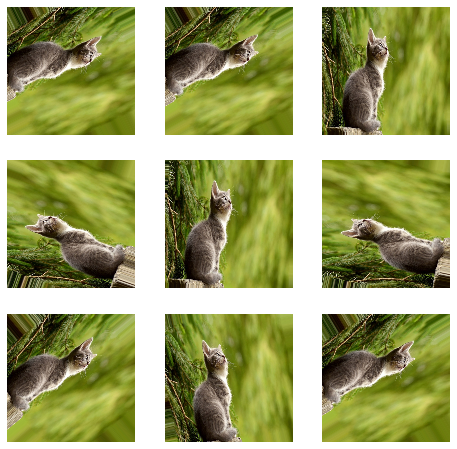

In [4]:
# 1. Random rotations
augment( ImageDataGenerator(rotation_range=90) )

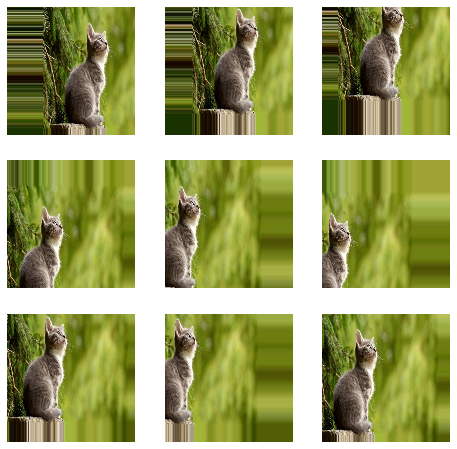

In [5]:
# 2. Random shifts
augment( ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3) )

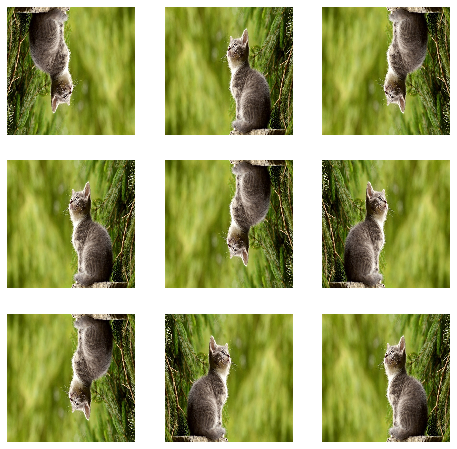

In [6]:
# 3. Random flips
augment( ImageDataGenerator(horizontal_flip=True, vertical_flip=True) )

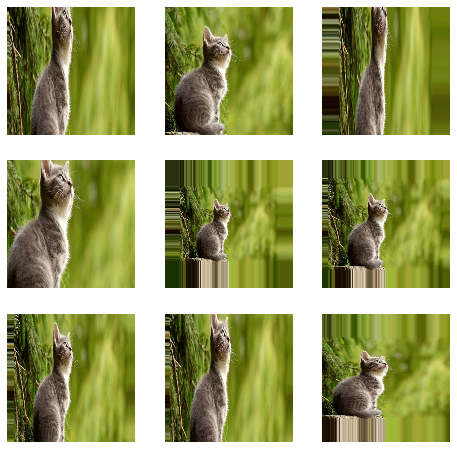

In [7]:
# 4. Zoom into data
augment( ImageDataGenerator( zoom_range=0.7 ) )

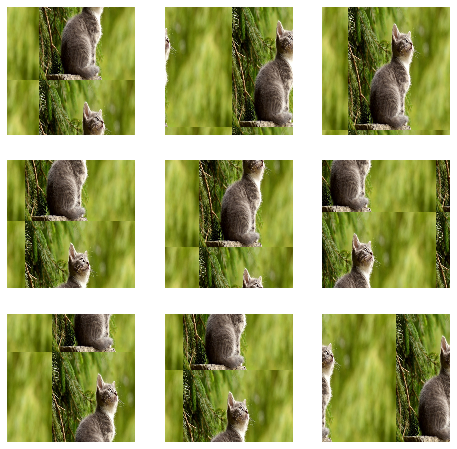

In [8]:
# 5. Shift data with fill 
augment( ImageDataGenerator(width_shift_range=0.5, height_shift_range=0.5, fill_mode='wrap') )

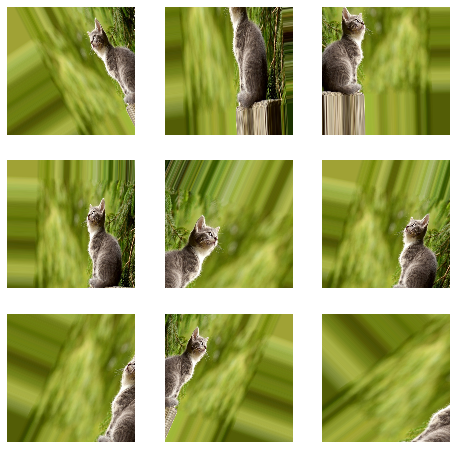

In [9]:
# 6. Mixed
augment( ImageDataGenerator( rotation_range=50, width_shift_range=0.4, height_shift_range=0.3,
            shear_range=0.3, zoom_range=0.3, horizontal_flip=True, fill_mode='nearest') )